## Data Visualization

Read the data and import the libraries.

In [1]:
import pandas as pd
import numpy as np

data_explore = pd.read_csv("data_explore.csv")
data_explore = data_explore.drop('Unnamed: 0', axis=1)

In [2]:
# copied from: HandsOn ML Master Book

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

**I. Create two subplots initially:**

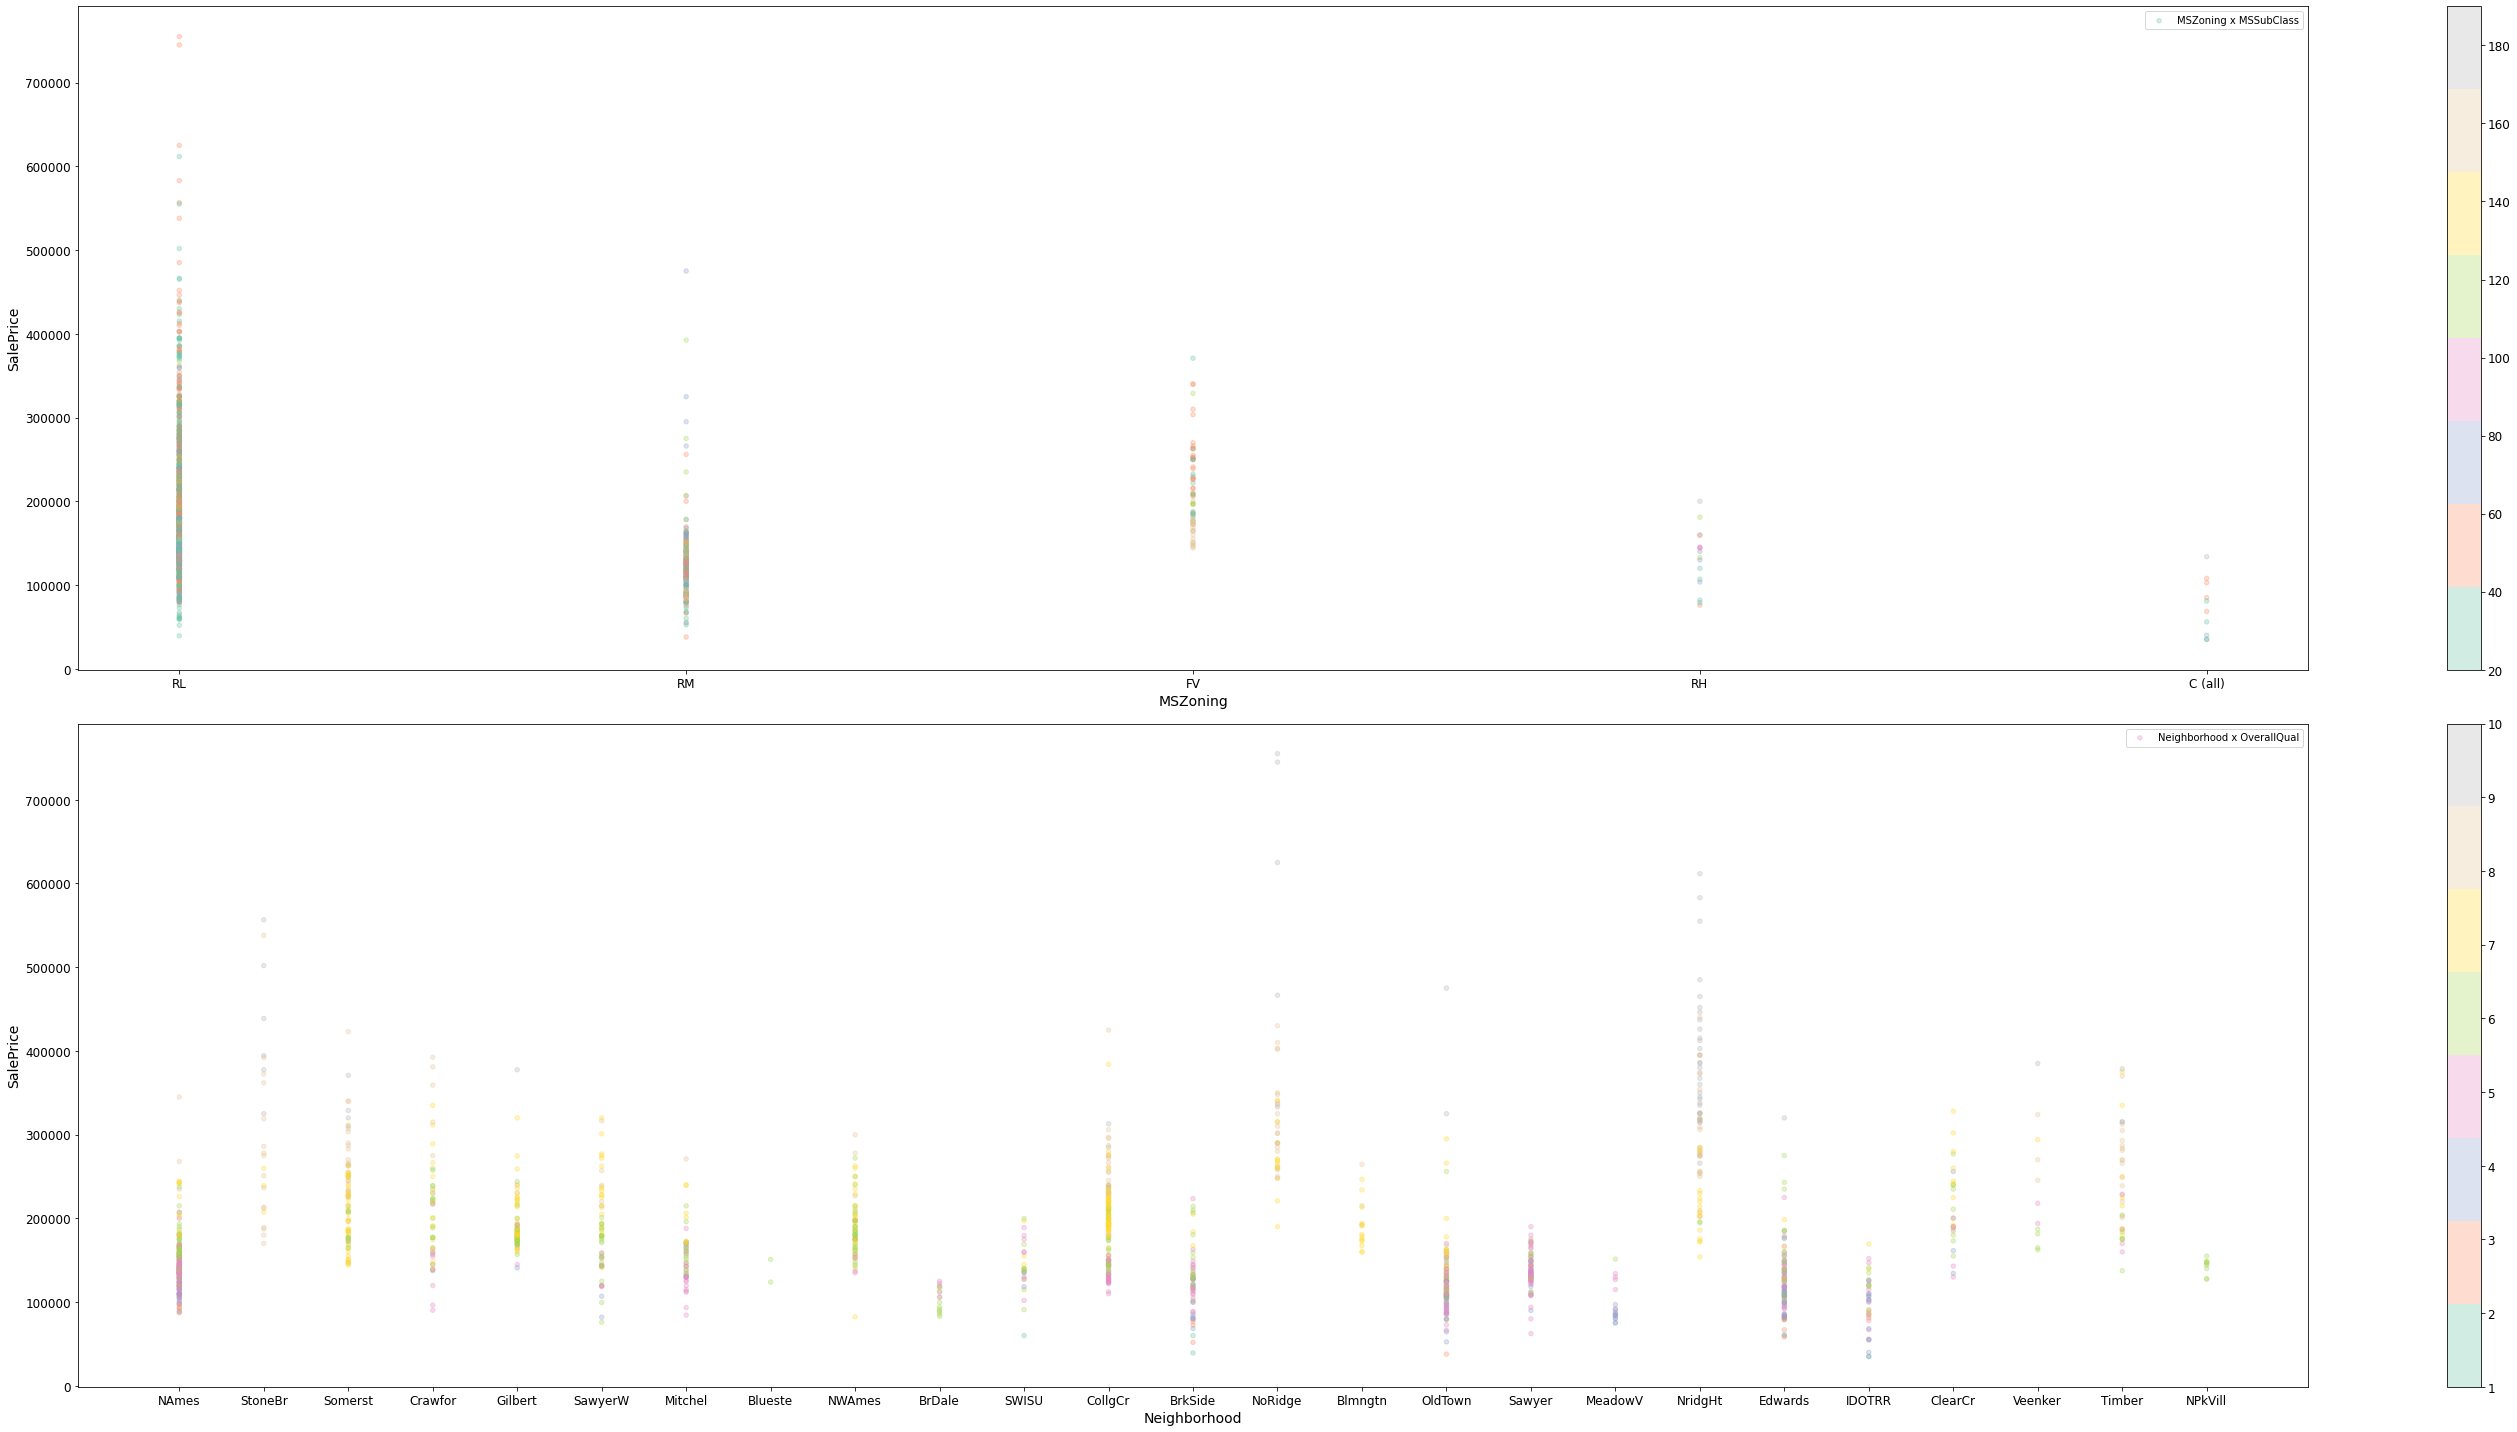

In [3]:
# copied from: HandsOn ML Master Book

fig, axes = plt.subplots(2,1)

data_explore.plot(kind = "scatter", x = "MSZoning", y = "SalePrice", alpha = 0.3,
    c = data_explore["MSSubClass"], label = "MSZoning x MSSubClass", figsize = (40,20),
    cmap = "Set2", colorbar = True, ax=axes[0])

data_explore.plot(kind = "scatter", x = "Neighborhood", y = "SalePrice", alpha = 0.3,
    c = data_explore["OverallQual"], label = "Neighborhood x OverallQual", figsize = (40,20),
    cmap = "Set2", colorbar = True, ax=axes[1])

plt.savefig('plot1')
plt.tight_layout()

After the initial data visualization, we can see that we no longer need to remove any outliers from this data.

**II. Perform PCA to be able to plot all the important variables.**

Load the scaled data. Import the libraries.

In [4]:
X_train_exp = pd.read_csv("X_train_exp_scaled.csv")
X_test_exp = pd.read_csv("X_test_exp_scaled.csv")
X_train_OH = pd.read_csv("X_train_OH_scaled.csv")
X_test_OH = pd.read_csv("X_test_OH_scaled.csv")

X_train_exp = X_train_exp.drop('Unnamed: 0', axis=1)
X_test_exp = X_test_exp.drop('Unnamed: 0', axis=1)
X_train_OH = X_train_OH.drop('Unnamed: 0', axis=1)
X_test_OH = X_test_OH.drop('Unnamed: 0', axis=1)

#Scaled_data_exp = pd.concat([X_train_exp, X_test_exp], ignore_index=True)
#Scaled_data_OH = pd.concat([X_train_OH, X_texp_OH], ignore_index=True)

In [5]:
Scaled_data_exp = pd.concat([X_train_exp, X_test_exp], ignore_index=True)
Scaled_data_OH = pd.concat([X_train_OH, X_test_OH], ignore_index=True)

In [6]:
Scaled_data_OH

,Id,MSSubClass,Pred_LF,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,OverallQual,...,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,House_Age,Remodel_Age,GA_binned
0,-1.354637,-0.883484,0.374968,-0.431195,-0.322572,0.067754,-0.238435,0.711878,0.027608,-0.795962,...,-0.136452,-0.231888,-0.207102,-0.249595,-0.133527,-0.160565,-0.091916,0.724323,1.691150,0.809274
1,-0.095598,2.376619,-2.334082,-1.223595,-0.529773,0.067754,-0.238435,-0.981412,0.027608,0.652545,...,-0.136452,-0.231888,-0.207102,-0.249595,7.489123,-0.160565,-0.091916,-0.411522,0.043586,-0.036727
2,0.418489,-0.883484,0.374968,-0.255918,-0.176038,0.067754,-0.238435,-0.981412,0.027608,-0.795962,...,-0.136452,-0.231888,-0.207102,-0.249595,-0.133527,-0.160565,-0.091916,0.490473,-0.731738,-0.036727
3,1.011118,-0.883484,0.374968,-0.562653,-0.217905,0.067754,-0.238435,-0.981412,0.027608,-0.071708,...,-0.136452,-0.231888,-0.207102,-0.249595,-0.133527,-0.160565,-0.091916,0.724323,1.691150,0.809274
4,1.208661,-0.883484,0.374968,0.196518,0.158121,0.067754,-0.238435,-0.981412,0.027608,-0.795962,...,-0.136452,-0.231888,-0.207102,-0.249595,-0.133527,-0.160565,-0.091916,0.423658,1.255030,0.809274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.277682,-0.184891,0.508203,0.266361,0.069929,0.067754,-0.238435,0.711878,0.027608,-1.520216,...,-0.136452,-0.231888,-0.207102,-0.249595,-0.133527,-0.160565,-0.091916,0.490473,-0.198703,0.809274
1455,-0.219360,-0.883484,0.508203,0.445191,-0.123898,0.067754,-0.238435,0.711878,0.027608,-0.795962,...,-0.136452,-0.231888,-0.207102,-0.249595,-0.133527,-0.160565,-0.091916,0.590695,-0.974027,0.809274
1456,0.187626,-0.883484,0.508203,0.226095,-0.148127,0.067754,-0.238435,0.711878,0.027608,-0.795962,...,-0.136452,-0.231888,-0.207102,-0.249595,-0.133527,-0.160565,-0.091916,0.590695,1.497319,0.809274
1457,0.399449,-0.883484,0.508203,0.266361,0.267052,0.067754,-0.238435,0.711878,0.027608,-0.795962,...,-0.136452,4.312426,-0.207102,-0.249595,-0.133527,-0.160565,-0.091916,0.590695,1.497319,0.809274


In [7]:
# copied from: https://www.youtube.com/watch?v=Lsue2gEM9D0

from sklearn.decomposition import PCA

pca = PCA()
OH_scaled_pca = pca.fit_transform(Scaled_data_OH)

In [8]:
# Screeplot to calculate the percentage of variation of each PC

per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range (1, len(per_var) + 1)]

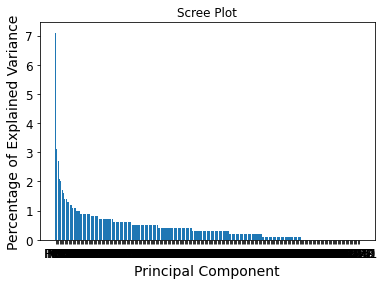

In [10]:
# Bar plot to visualize

plt.bar(x = range (1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [11]:
OH_vars = Scaled_data_OH.columns.tolist()

In [12]:
# top 20 variables for Scaled_data_OH

loading_scores = pd.Series(pca.components_[0], index=OH_vars)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_20_var = sorted_loading_scores[0:20].index.values
print(loading_scores[top_20_var])

SalePrice             0.210254
House_Age            -0.202469
OverallQual           0.202271
ExterQual             0.191180
GA_binned            -0.188864
GarageCars            0.186551
GarageFinish          0.179856
KitchenQual           0.178853
GarageArea            0.177526
BsmtQual              0.177086
FoundationPConc       0.168729
Remodel_Age          -0.164890
TotalBsmtSF           0.158635
GarageType            0.150467
FullBath              0.149082
GrLivArea             0.140556
1stFlrSF              0.137922
HeatingQC             0.137017
Exterior1stVinylSd    0.127519
Exterior2ndVinylSd    0.127308
dtype: float64


In [16]:
# PCA plot

In [13]:
# For the Scaled_data_exp

# exp_scaled_pca = pca.fit_transform(Scaled_data_exp)